In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
data = tf.keras.datasets.mnist

In [ ]:
data

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [ ]:
(xtrain, ytrain), (xtest, ytest) = data.load_data()

In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
ytrain.shape

(60000,)

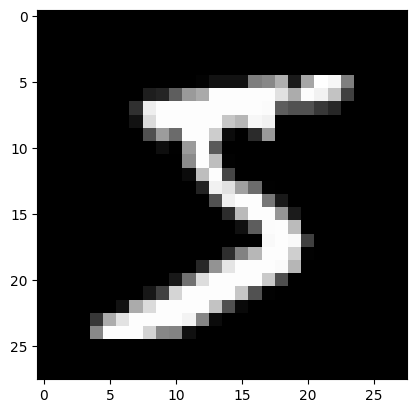

In [ ]:
plt.imshow(xtrain[0],  cmap='gray')

In [ ]:
from keras.layers.attention.multi_head_attention import activation
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 512)               401920    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 512)               262656    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 512)               262656    
                                                                 
 dropout_10 (Dropout)        (None, 512)              

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

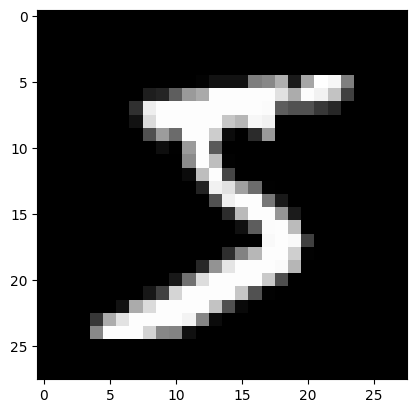

In [ ]:
plt.imshow(xtrain[0],  cmap='gray')

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.fit(xtrain, ytrain, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 48s 25ms/step - loss: 1.9331 - accuracy: 0.4929
Epoch 2/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.4996 - accuracy: 0.8750
Epoch 3/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.3542 - accuracy: 0.9189
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3113 - accuracy: 0.9311
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2890 - accuracy: 0.9366
Epoch 6/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2609 - accuracy: 0.9444
Epoch 7/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2497 - accuracy: 0.9463
Epoch 8/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2299 - accuracy: 0.9515
Epoch 9/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2222 - accuracy: 0.9537
Epoch 10/10
1875/1875 [==============================] - 46s 24m

In [ ]:
model.evaluate(xtest,  ytest, verbose=2)

313/313 - 1s - loss: 0.2147 - accuracy: 0.9608 - 1s/epoch - 4ms/step


[0.21473954617977142, 0.9607999920845032]

In [ ]:
model.weights

[<tf.Variable 'dense_17/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.02349801,  0.03833924,  0.01940358, ..., -0.03639741,
         -0.02589178,  0.01145266],
        [ 0.04399866, -0.03163612, -0.04524621, ...,  0.00311571,
         -0.00037942, -0.06196395],
        [-0.04151411,  0.03760082, -0.0171507 , ...,  0.03676611,
         -0.06492564,  0.0505396 ],
        ...,
        [ 0.02889706,  0.0249205 , -0.06239885, ...,  0.00632528,
         -0.04591276, -0.02085097],
        [-0.05269397,  0.05088982,  0.05838248, ..., -0.04995746,
          0.05598793,  0.05490853],
        [-0.00818863,  0.02810014,  0.03722928, ...,  0.0568989 ,
          0.06247112, -0.04313013]], dtype=float32)>,
 <tf.Variable 'dense_17/bias:0' shape=(512,) dtype=float32, numpy=
 array([ 0.02024203, -0.03686148,  0.04721133, -0.10462981, -0.01720662,
         0.0151637 , -0.06900814, -0.01369493,  0.02271182, -0.05195685,
        -0.0135717 , -0.05105898, -0.11809127, -0.01945879, -0.08680403

In [ ]:
proba_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [ ]:
pred = proba_model(xtest[5:6])

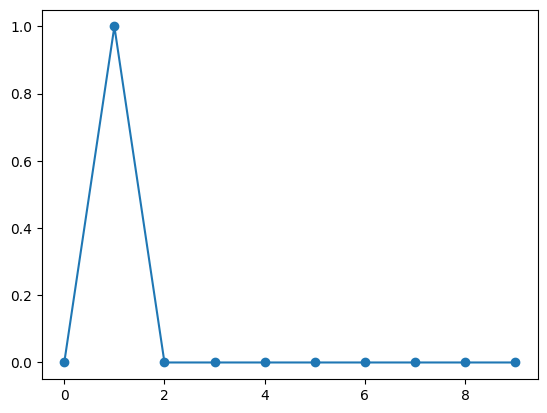

In [ ]:
plt.plot(pred[0], marker='o')

In [ ]:
np.argmax(pred)

1

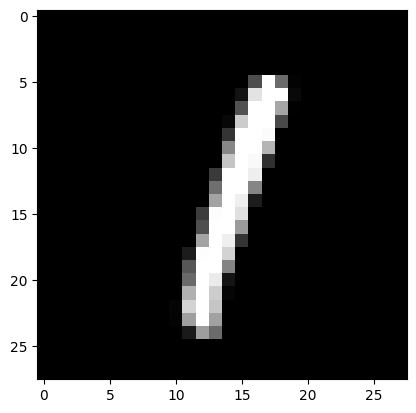

In [ ]:
plt.imshow(xtest[5],cmap='gray')